Reference:
Raschka et al.

https://cfteach.github.io/NNDL_DATA621/referencesmc.html

## Code examples for Data Preprocessing

In [6]:
import numpy as np

In [1]:
from IPython.display import Image
%matplotlib inline

### Dealing with missing data

Identifying missing values in tabular data

In [2]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

# StringIO simulates a file=like object in memory,
#like if it was a regular CSV file to read from the hard drive
df = pd.read_csv(StringIO(csv_data))

df

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

In [3]:
df.isnull()

A      B      C      D
0  False  False  False  False
1  False  False   True  False
2  False  False  False   True

In [4]:
df.isnull().sum(axis=0)

A    0
B    0
C    1
D    1
dtype: int64

In [7]:
data = pd.Series([1, np.nan, 3, None, 5])
print(data.isnull())

0    False
1     True
2    False
3     True
4    False
dtype: bool


In [8]:
# access the underlying NumPy array
# via the `values` attribute
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [9]:
data = np.array([1, np.nan, 3, None], dtype=float)
data

print(np.isnan(data))

[False  True False  True]


<br>
<br>

Eliminating training examples or features with missing values

In [10]:
df

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

In [11]:
# remove rows that contain missing values

df.dropna(axis=0)

A    B    C    D
0  1.0  2.0  3.0  4.0

In [12]:
# remove columns that contain missing values

df.dropna(axis=1)

A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0

In [13]:
# only drop rows where all columns are NaN

df.dropna(how='all')

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

In [15]:
# drop rows that have fewer than 4 real values

df.dropna(thresh=4)

A    B    C    D
0  1.0  2.0  3.0  4.0

In [16]:
# only drop rows where NaN appear in specific columns (here: 'C')

df.dropna(subset=['C'])

A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN

<br>
<br>

### Imputing missing values

In [17]:
# again: our original array
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [18]:
# impute missing values via the column mean

from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean') #other methods: 'median', 'most_frequent'
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

<br>
<br>

In [19]:
df.fillna(df.mean())

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   7.5  8.0
2  10.0  11.0  12.0  6.0

In [24]:
df

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

In [20]:
dg = df.copy()

In [21]:
row, col = (dg == 5.0).stack().idxmax()
print(row, col)

1 A


In [22]:
dg.loc[0,'A'] = None

In [23]:
dg

A     B     C    D
0   NaN   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

<br>
<br>

### Handling categorical data

----- Nominal and ordinal features

In [25]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

color size  price classlabel
0  green    M   10.1     class2
1    red    L   13.5     class1
2   blue   XL   15.3     class2

In [26]:
dg = pd.DataFrame([['green','XL','class1'],['yellow','M','class1'],['red','L','class2'],['blue','S','class2']])
dg.columns = ['colors','size','label']
dg

colors size   label
0   green   XL  class1
1  yellow    M  class1
2     red    L  class2
3    blue    S  class2

In [27]:
mapping = {'XL':4,'L':3,'M':2,'S':1}

In [28]:
dg['size'] = dg['size'].map(mapping)

In [29]:
dg

colors  size   label
0   green     4  class1
1  yellow     2  class1
2     red     3  class2
3    blue     1  class2

In [30]:
for k,s in mapping.items():
  print(k,s)

XL 4
L 3
M 2
S 1


In [31]:
inverse_mapping = {k:s for s,k in mapping.items()}
inverse_mapping

{4: 'XL', 3: 'L', 2: 'M', 1: 'S'}

In [32]:
dg['size'] = dg['size'].map(inverse_mapping)

In [33]:
dg

colors size   label
0   green   XL  class1
1  yellow    M  class1
2     red    L  class2
3    blue    S  class2

<br>
<br>

Mapping ordinal features

In [34]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2

In [35]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

<br>
<br>

### Encoding class labels

In [36]:
import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [37]:
# to convert class labels from strings to integers
df['classlabel'] = df['classlabel'].map(class_mapping)
df

color  size  price  classlabel
0  green     1   10.1           1
1    red     2   13.5           0
2   blue     3   15.3           1

In [38]:
# reverse the class label mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2

In [39]:
df['classlabel']

0    class2
1    class1
2    class2
Name: classlabel, dtype: object

In [40]:
df['classlabel'].values

array(['class2', 'class1', 'class2'], dtype=object)

In [41]:
df

color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2

In [42]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [43]:
# reverse mapping
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

<br>
<br>

### Performing one-hot encoding on nominal features

In [44]:
df

color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2

In [45]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X


array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [46]:
np.shape(X[:, 0])

(3,)

In [47]:
np.shape(X[:, 0].reshape(-1, 1))

(3, 1)

In [48]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [49]:
np.shape(color_ohe.fit_transform(X[:, 0].reshape(-1, 1)))

(3, 3)

In [50]:
np.shape(color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray())

(3, 3)

In [51]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [52]:
dh = pd.DataFrame([['green',10.2, 1],['blue',8.2, 1],['yellow',9.8, 0]])
dh.columns = ['colors','price','label']
dh

colors  price  label
0   green   10.2      1
1    blue    8.2      1
2  yellow    9.8      0

In [53]:
dh['colors']

0     green
1      blue
2    yellow
Name: colors, dtype: object

In [54]:
new_var = pd.get_dummies(dh[['colors','price','label']])


In [55]:
df


color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2

In [56]:
# one-hot encoding via pandas

pd.get_dummies(df[['price', 'color', 'size']]).astype(int)

price  size  color_blue  color_green  color_red
0     10     1           0            1          0
1     13     2           0            0          1
2     15     3           1            0          0

In [57]:
# multicollinearity in get_dummies

pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

price  size  color_green  color_red
0   10.1     1         True      False
1   13.5     2        False       True
2   15.3     3        False      False

In [58]:
# multicollinearity guard for the OneHotEncoder

color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

<br>
<br>

<br>
<br>

### Partitioning a dataset into a separate training and test set

In [59]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [60]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)

<br>
<br>

### Bringing features onto the same scale

In [61]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [62]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

A visual example:

In [63]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('standardized:', (ex - ex.mean()) / ex.std())

# Please note that pandas uses ddof=1 (sample standard deviation)
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


<br>
<br>

### Selecting meaningful features

---- Sparse solutions with L1-regularization

For regularized models in scikit-learn that support L1 regularization, we can simply set the `penalty` parameter to `'l1'` to obtain a sparse solution:

In [64]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1')

LogisticRegression(penalty='l1')

Applied to the standardized Wine data ...

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [66]:
lr.intercept_

array([-1.26352457, -1.21576785, -2.3711671 ])

In [67]:
np.set_printoptions(8)

In [68]:
lr.coef_[lr.coef_!=0].shape

(23,)

In [69]:
lr.coef_

array([[ 1.24574039,  0.18046984,  0.74484363, -1.16251576,  0.        ,
         0.        ,  1.16495206,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55194572,  2.50968308],
       [-1.53727681, -0.38718475, -0.99524098,  0.36476702, -0.05956256,
         0.        ,  0.6679675 ,  0.        ,  0.        , -1.93383967,
         1.23411639,  0.        , -2.23183041],
       [ 0.13539093,  0.16972595,  0.35779691,  0.        ,  0.        ,
         0.        , -2.43329298,  0.        ,  0.        ,  1.56172158,
        -0.81756997, -0.49748177,  0.        ]])

In [70]:
np.shape(lr.coef_)

(3, 13)

In [71]:
lr.coef_[1]

array([-1.53727681, -0.38718475, -0.99524098,  0.36476702, -0.05956256,
        0.        ,  0.6679675 ,  0.        ,  0.        , -1.93383967,
        1.23411639,  0.        , -2.23183041])

(10, 13)
0 blue
1 green
2 red
3 cyan
4 magenta
5 yellow
6 black
7 pink
8 lightgreen
9 lightblue
10 gray
11 indigo
12 orange


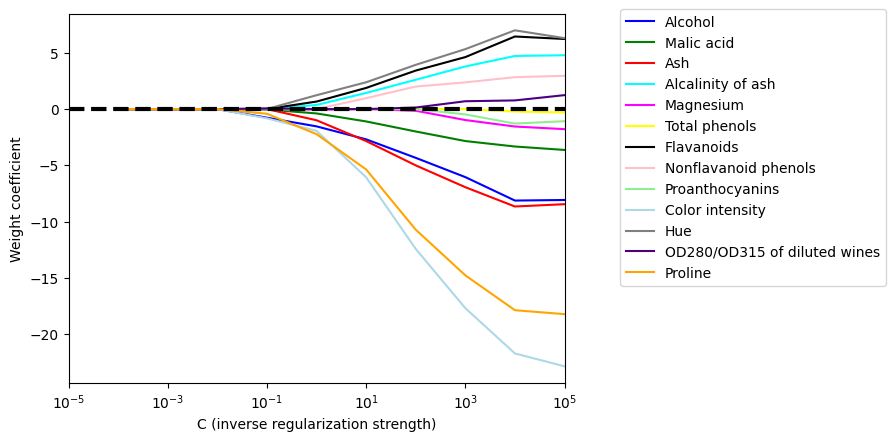

In [72]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear',
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

print(np.shape(weights)) #dims of weights (10,13)

# you want to show how each weight (corresponding to a feature) changes vs regularization intensity

for column, color in zip(range(weights.shape[1]), colors):
    print(column,color)
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

#plt.savefig('figures/04_08.png', dpi=300,
#            bbox_inches='tight', pad_inches=0.2)

plt.show()

<br>
<br>

<br>
<br>

### Assessing feature importance with Random Forests

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


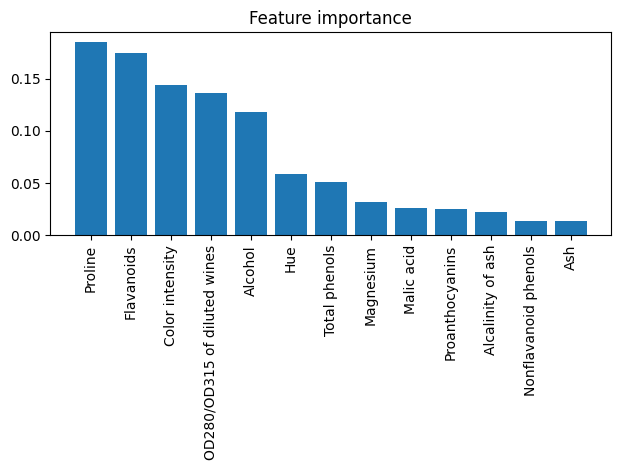

In [76]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

In [77]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:',
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5


Now, let's print the 3 features that met the threshold criterion for feature selection that we set earlier (note that this code snippet does not appear in the actual book but was added to this notebook later for illustrative purposes):

In [78]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


<br>
<br>

---- Example in Python of Feature Importance for Regression problems

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

# Load sample data
data =  fetch_california_housing()
X, y = data.data, data.target

# Fit Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Print feature importance
feature_importance = model.feature_importances_
for i, imp in enumerate(feature_importance):
    print(f"Feature {data.feature_names[i]}: {imp}")


Feature MedInc: 0.5200367196529164
Feature HouseAge: 0.05296357881747684
Feature AveRooms: 0.04451309296326938
Feature AveBedrms: 0.029298856378707893
Feature Population: 0.03123174949895071
Feature AveOccup: 0.13640641507927073
Feature Latitude: 0.09285575343954347
Feature Longitude: 0.09269383416986465
